In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [2]:
df=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


    It is a classification problem want to predict the attrition is the target variable

In [4]:
df.shape

(1470, 35)

In [5]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The dataset doesnot contain any null values..

In [6]:
#checking datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

all data types are correct

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

EDA EXPLORATARY DATA ANALYSIS

In [8]:
#Statastical measures of dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


from the above we can observe that
1) in some  columns like mean is greater than median and some features median is greater than mean means there is askewness in data set.
2)n some columns there is a huge difference in between 75% and max which means there is possibility of outliers.

In [9]:
#check the list of counts on target
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

The target variable contains two differnt type of classes 'yes' or 'no'

In [10]:
#check the list of counts on target
df["Attrition"].nunique()

2

Attrition
No     1233
Yes     237
Name: count, dtype: int64

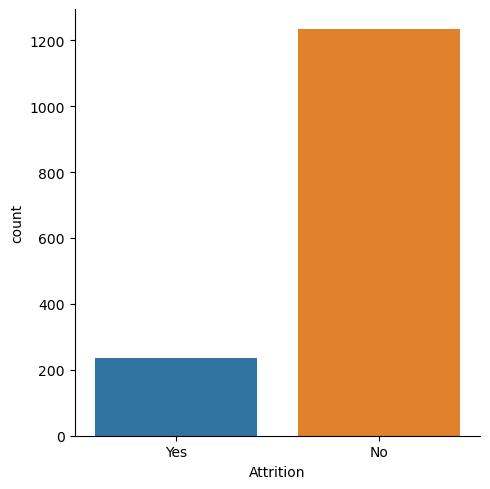

In [11]:
#Number of values for each quality
sns.catplot(x='Attrition', data=df, kind='count')
df['Attrition'].value_counts()

we can clearly see that dataset is imbalaced.
we want to replace yes and no with 0,1

In [12]:
#seperating the numerical and categorical columns

#checking the Categorical columns
Categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =="object": 
        Categorical_col.append(i)
 
print("Categorical columns:  ",Categorical_col)
print("\n")


Numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object": 
        Numerical_col.append(i)
 
print("Numerical columns:  ",Numerical_col)
print("\n")


Categorical columns:   ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Numerical columns:   ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']




# DATA VISULIZATION

UNIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

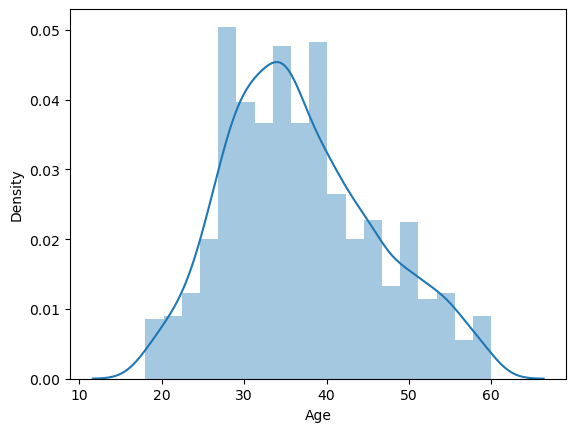

In [13]:
ax=sns.distplot(df["Age"],color=None)
plt.show

AGE is normally distributed most of them lies in between 25-45

<function matplotlib.pyplot.show(close=None, block=None)>

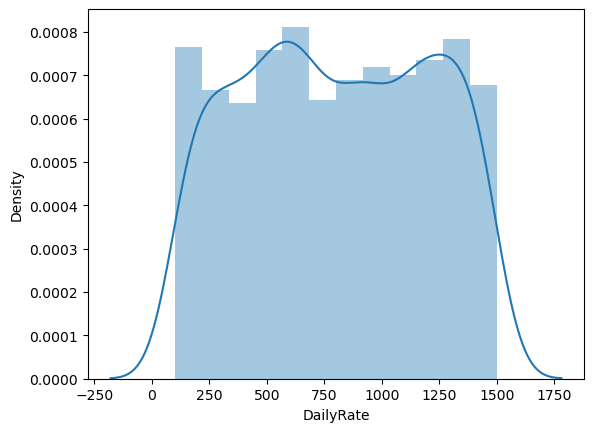

In [14]:
ax=sns.distplot(df["DailyRate"],color=None)
plt.show

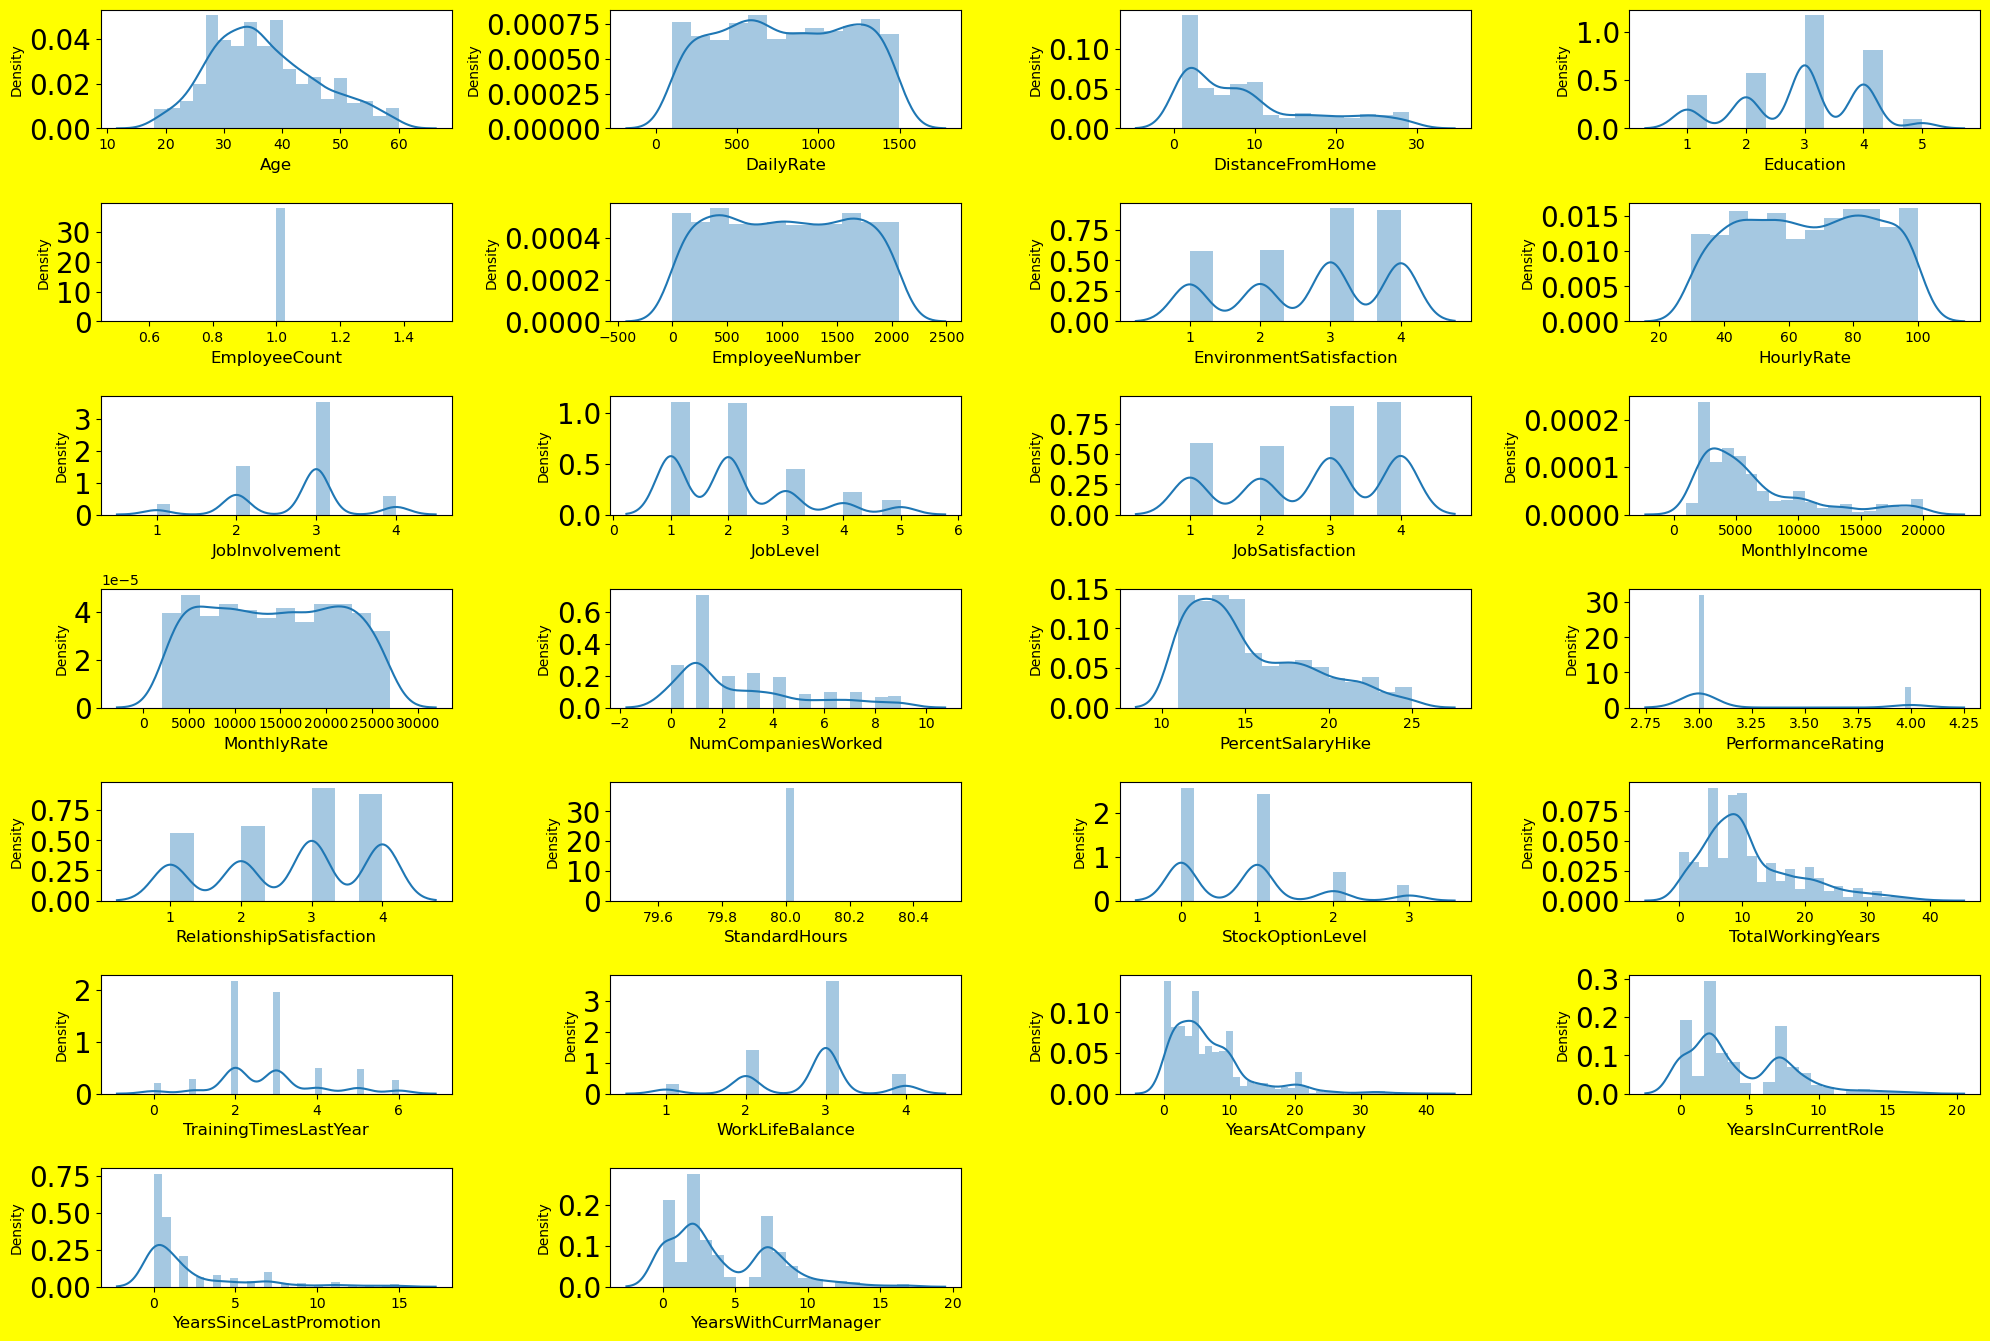

In [130]:
#CHECKING THE DISTRIBUTION
plt.figure(figsize=(20,15), facecolor= "yellow")
plotnumber = 1
for col in Numerical_col:
    if plotnumber<=30:
        ax=plt.subplot(8,4, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=20)
    plotnumber+=1
plt.tight_layout()

IN some features like Distancefrom home,monthly income,numcompany worked,oercentsalary hike,yearsat company,yearssincelastpromotion has leftskeweed means negative skewness.

Detecting outliers

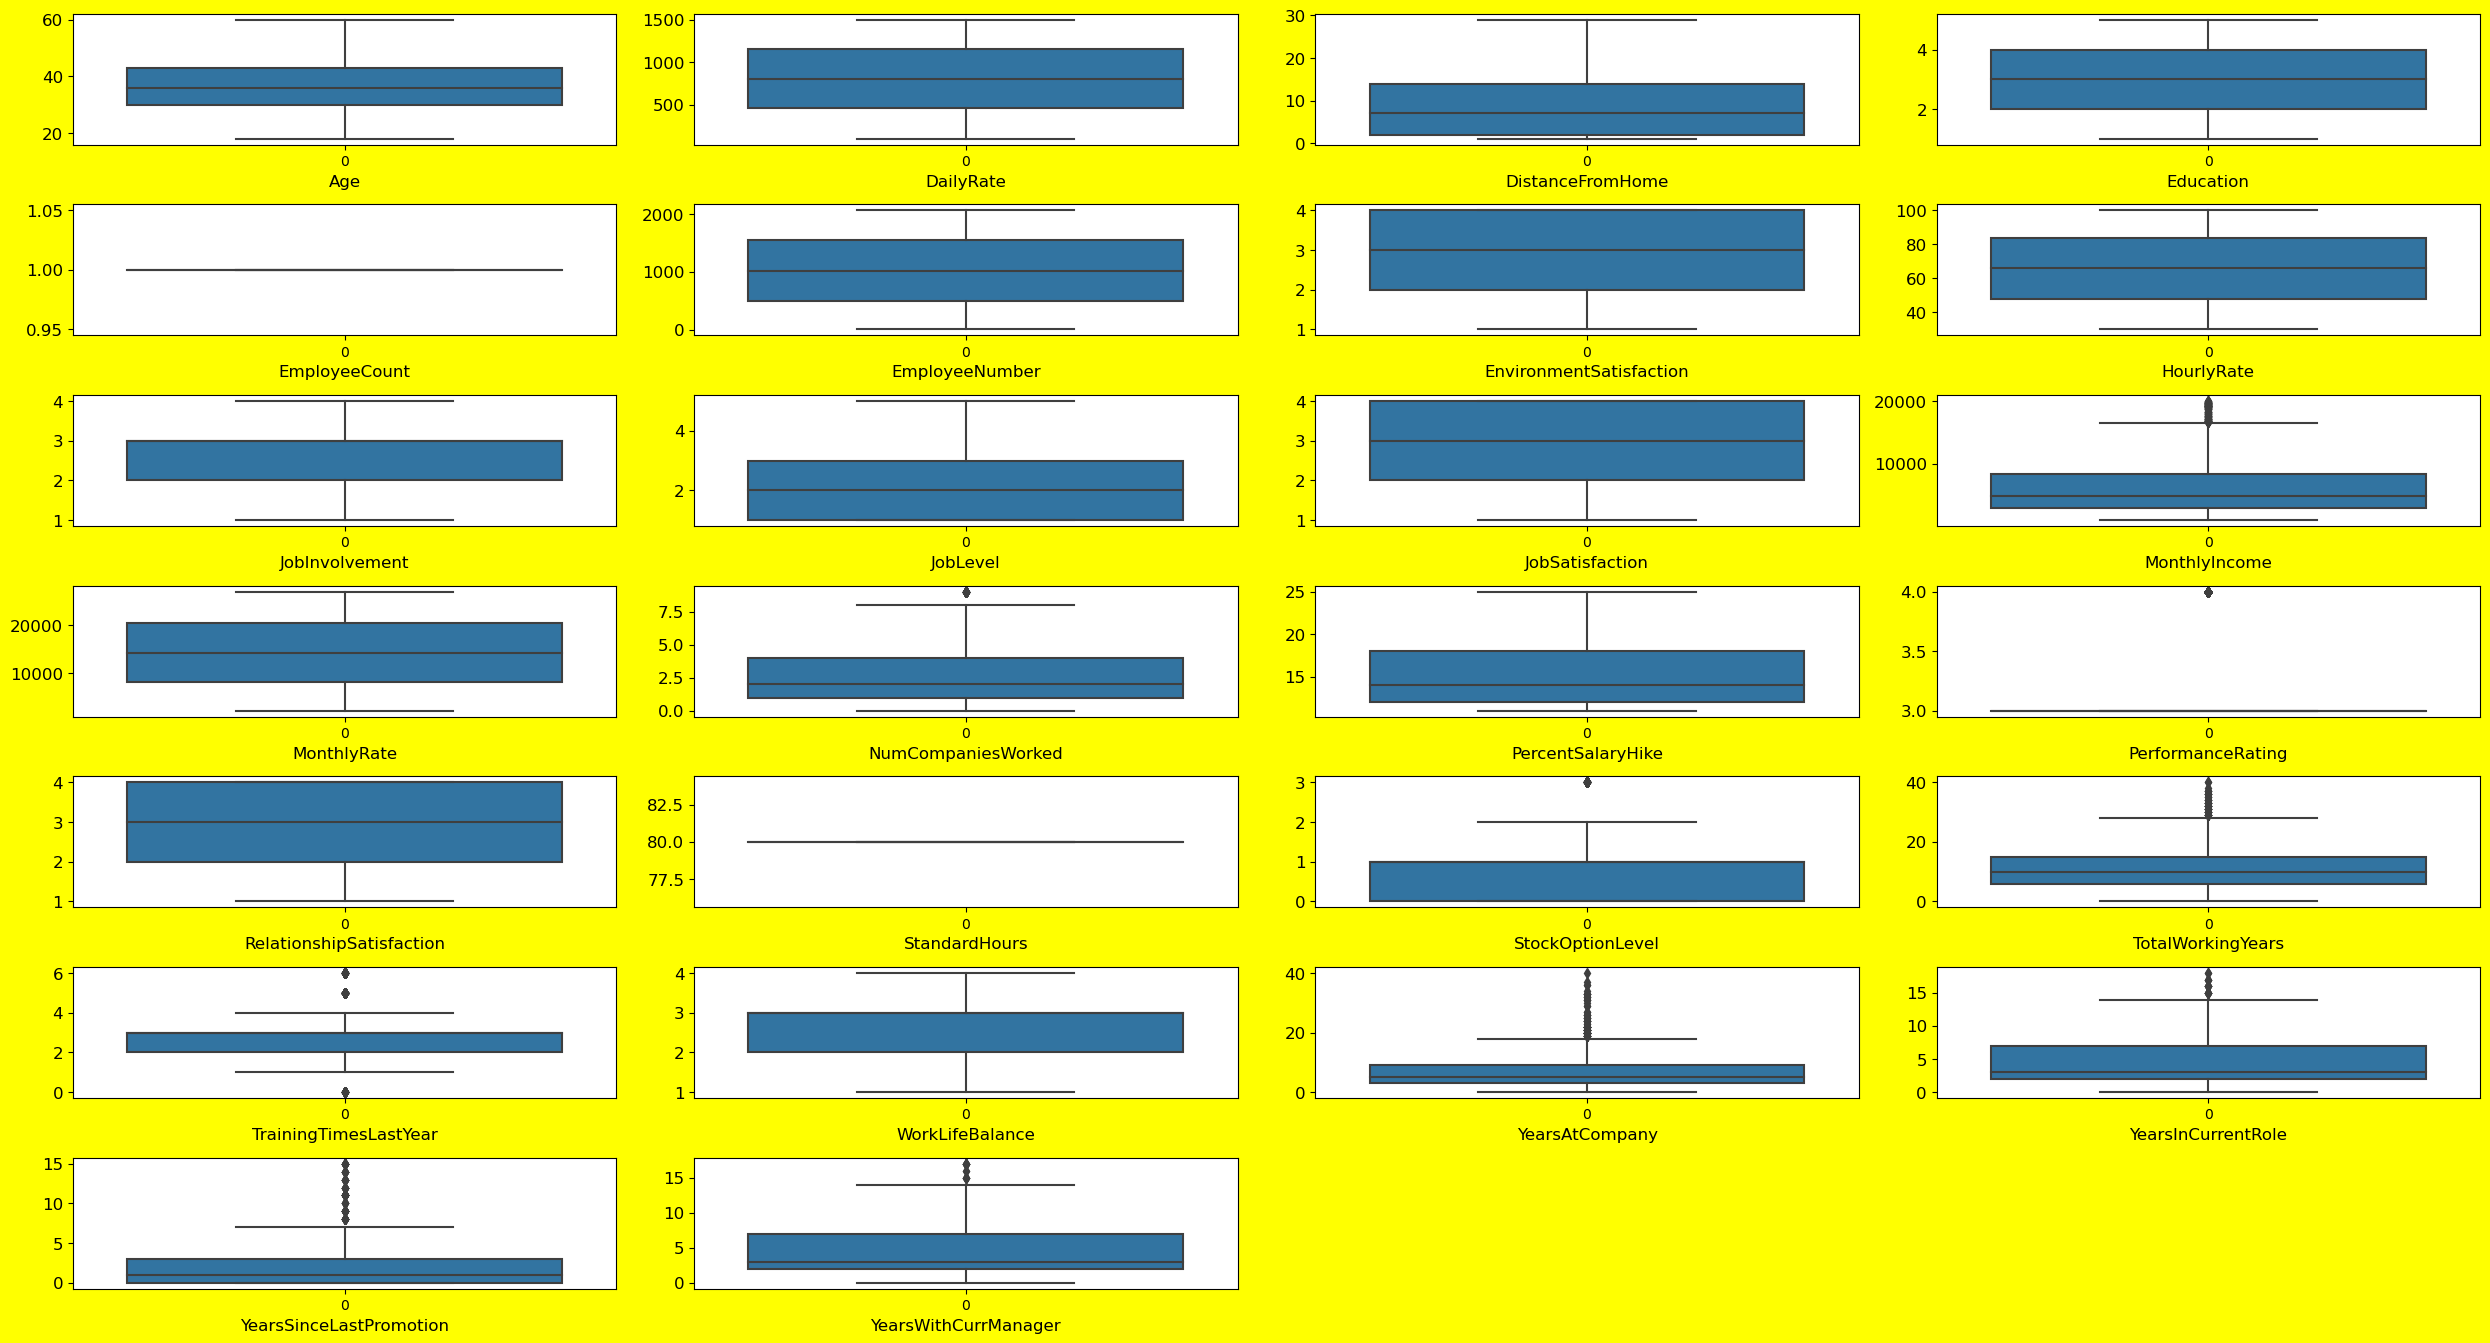

In [15]:
#CHECKING THE boxplot
plt.figure(figsize=(25,15), facecolor= "yellow")
plotnumber = 1
for col in Numerical_col:
    if plotnumber<=30:
        ax=plt.subplot(8,4, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=12)
    plotnumber+=1
plt.tight_layout()

there are some outliers in monthlyincome,numcompaniesworked,performance rating,stockoptionlevel,totalworkingyears,trainingtimeslast year,yearsatcompany,yearsin currentrole,yearssincelastpromotion and yearswithcurrmanager

 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [16]:
from scipy.stats import zscore
out_col=df[['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
z=np.abs(zscore(out_col))
z 

,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.108350,2.125136,0.426230,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,0.291719,0.678049,2.346151,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,0.937654,1.324226,0.426230,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,0.763634,0.678049,0.426230,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,0.644858,2.525591,0.426230,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...
1465,0.835451,0.523316,0.426230,0.241988,0.735447,0.155707,0.327893,0.615492,0.679146,0.314873
1466,0.741140,0.523316,0.426230,0.241988,0.293077,1.707500,0.001333,0.764998,0.368715,0.806541
1467,0.076690,0.678049,2.346151,0.241988,0.678774,2.171982,0.164613,0.615492,0.679146,0.314873
1468,0.236474,0.277594,0.426230,0.932014,0.735447,0.155707,0.325228,0.488900,0.679146,1.086895


In [17]:
#threesold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([9, 8, 6, 8, 7, 8, 4, 4, 6, 8, 7, 8, 9, 4, 6, 8, 9, 8, 4, 9, 6, 7,
        8, 7, 9, 6, 8, 4, 6, 7, 8, 8, 9, 4, 6, 6, 8, 8, 4, 7, 6, 6, 8, 6,
        9, 8, 6, 4, 6, 8, 9, 4, 9, 6, 8, 6, 9, 8, 7, 7, 6, 8, 8, 8, 6, 8,
        8, 9, 4,

In [18]:
z.iloc[28,9]

3.6100788863016295

In [19]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(1387, 35)

In [20]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 1470
new data frame.-- 1387


In [21]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 5.646258503401361


data loss is lessthan 10% we can drop the outliers.

In [22]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [23]:
df=df1

Converting the object data into numerical data

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= LE.fit_transform(df[i].values.reshape(-1,1))

In [25]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
#check the corr
cor = df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.011265,0.198502,-0.032676,NaN,-0.002704,...,0.041744,NaN,0.054506,0.636136,-0.019008,-0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.081788,-0.032703,0.023585,NaN,-0.010169,...,-0.052344,NaN,-0.136676,-0.185619,-0.057285,-0.062492,-0.166455,-0.171015,-0.029263,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.032873,-0.010560,0.022576,NaN,-0.013273,...,-0.029660,NaN,-0.015159,0.029818,0.010322,-0.014140,-0.027164,-0.029257,-0.027283,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.008171,-0.018442,0.040645,NaN,-0.044886,...,0.004516,NaN,0.048361,0.046173,0.005861,-0.044266,-0.003580,0.022899,-0.043870,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.023919,0.012846,0.013432,NaN,-0.007828,...,-0.037705,NaN,-0.003424,-0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,-0.011265,0.081788,-0.032873,-0.008171,0.023919,1.000000,0.001084,0.005882,NaN,0.029477,...,0.007885,NaN,0.049976,-0.001092,-0.034386,-0.034398,0.011579,0.019039,0.006635,-0.000221
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.001084,1.000000,-0.038017,NaN,0.042707,...,-0.002393,NaN,0.028494,0.125613,-0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,-0.038017,1.000000,NaN,0.000058,...,-0.013734,NaN,-0.015355,-0.012375,0.050502,0.034038,-0.012950,-0.010614,0.034094,0.013437
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.002704,-0.010169,-0.013273,-0.044886,-0.007828,0.029477,0.042707,0.000058,NaN,1.000000,...,-0.063017,NaN,0.063896,-0.010440,0.018555,0.006280,0.004058,-0.001112,-0.003801,-0.006224


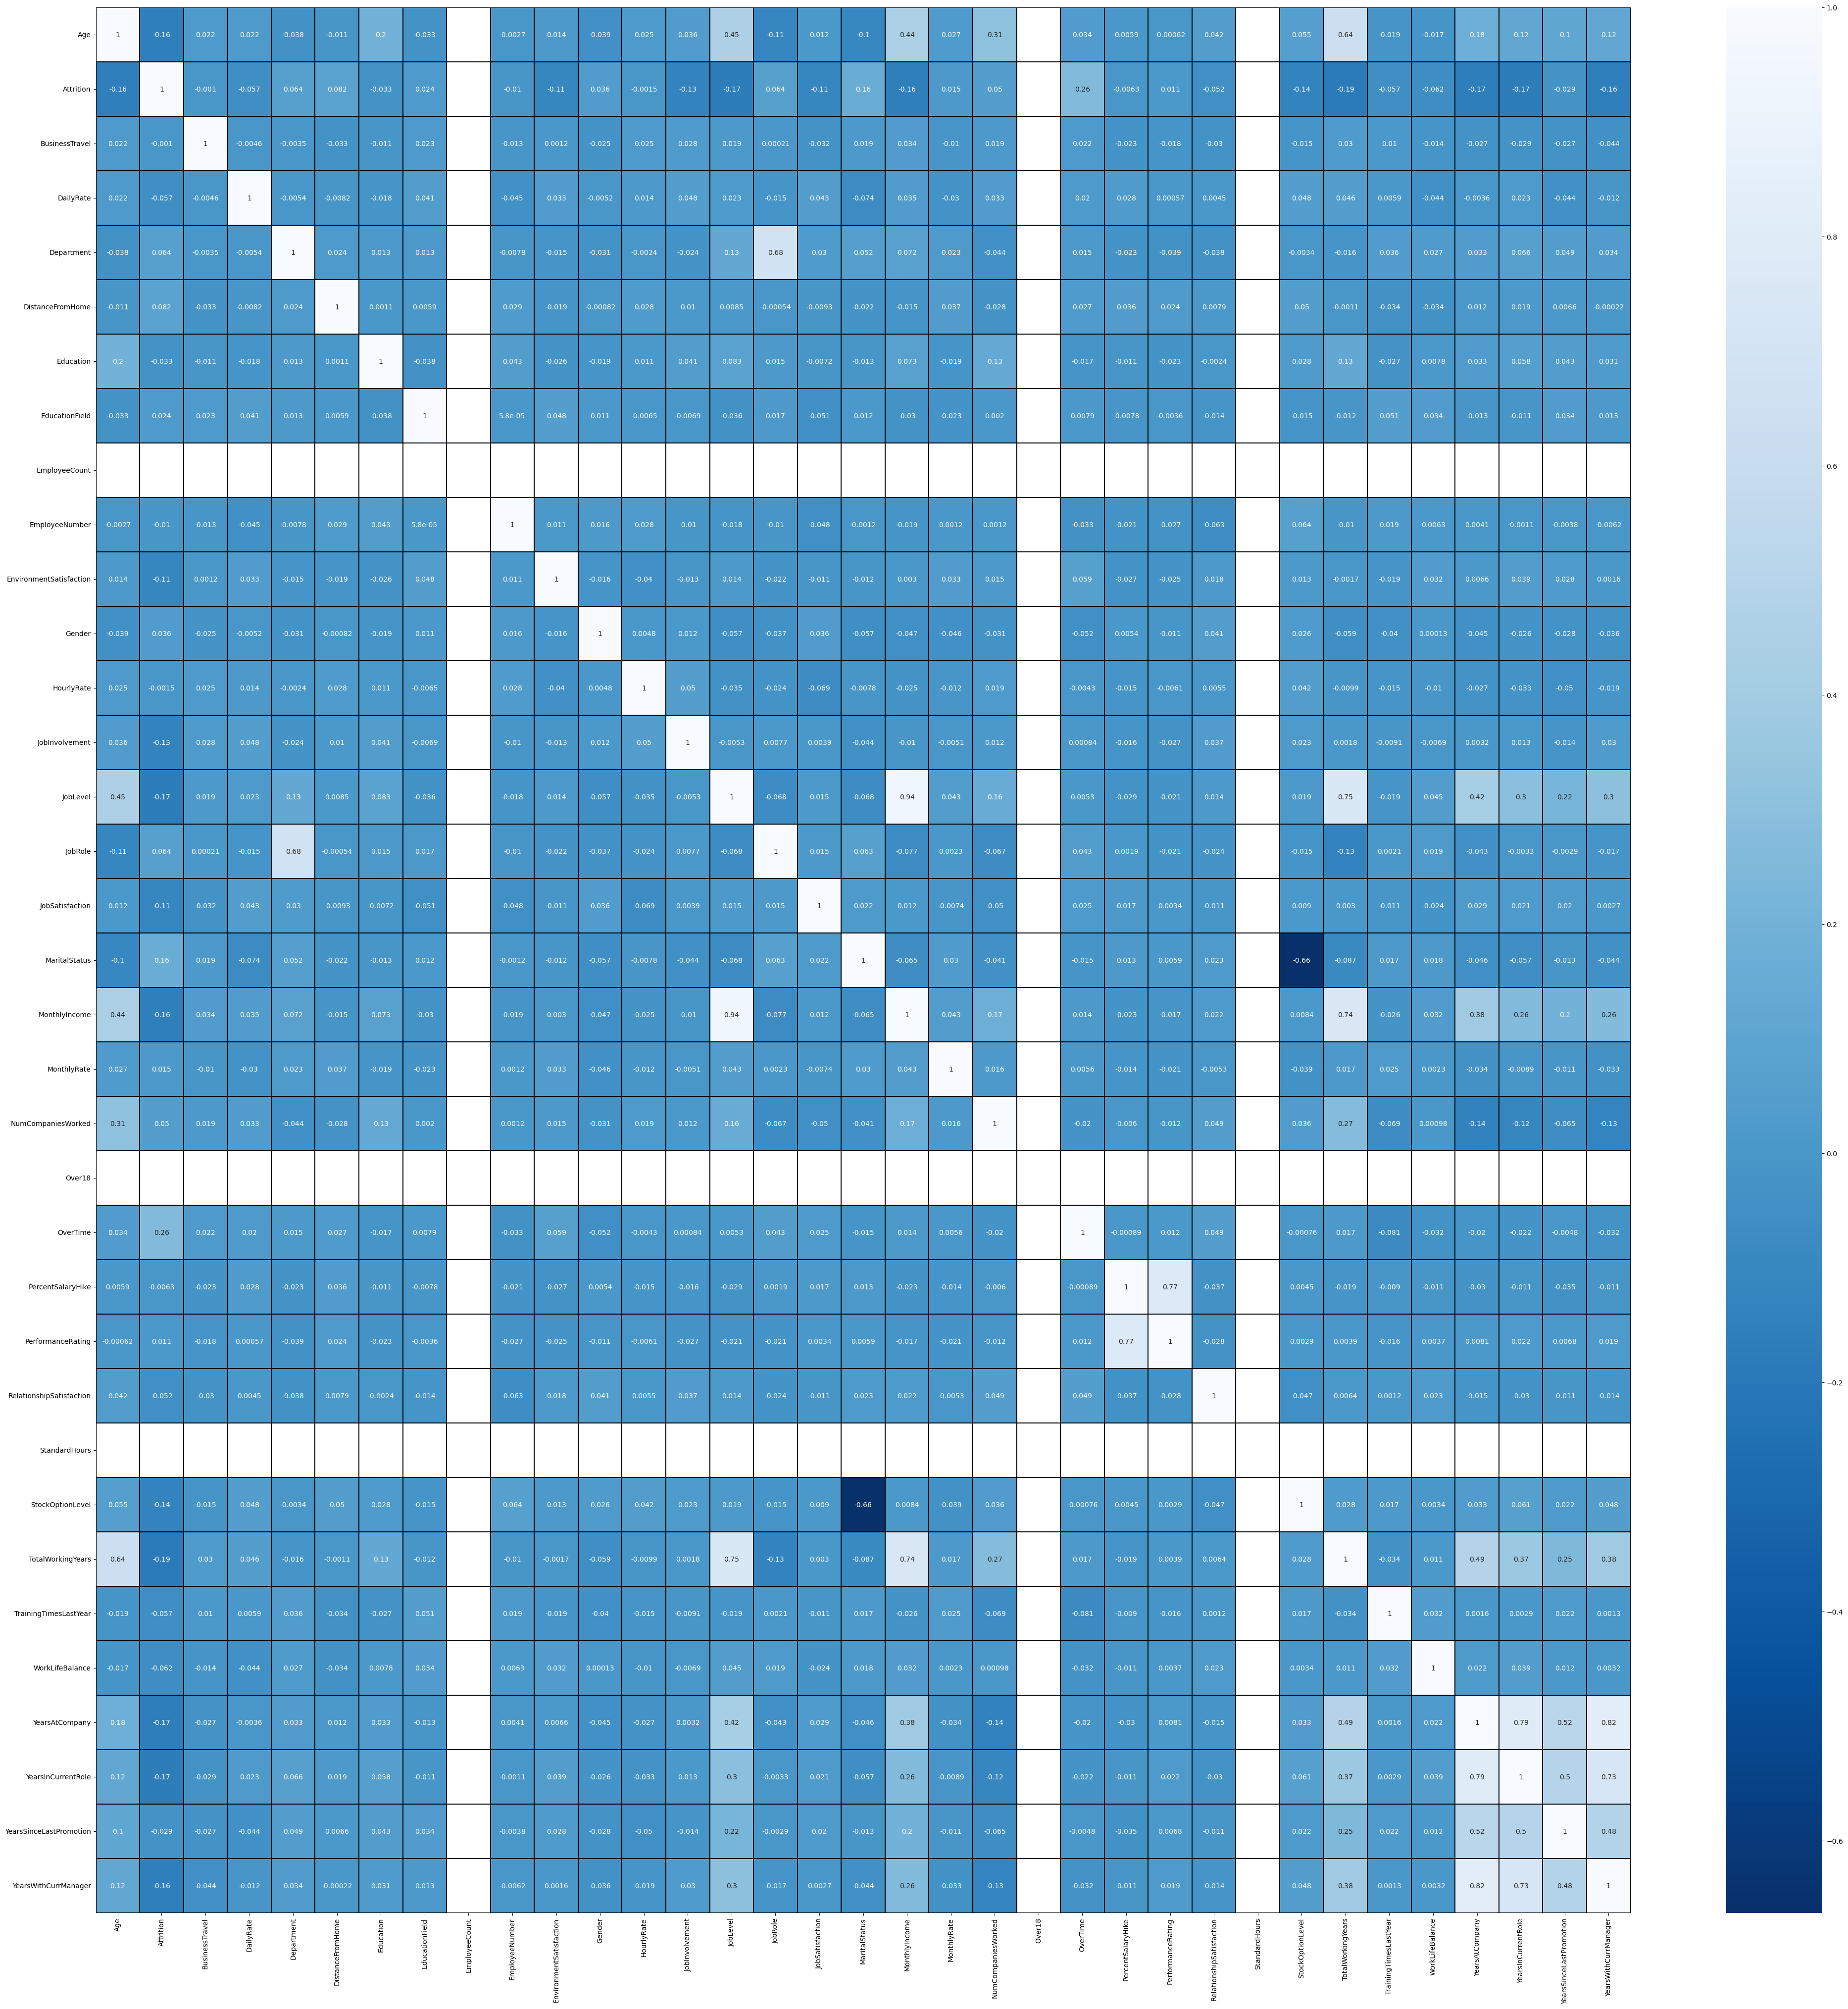

In [27]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.2g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

1)from the we can observe that Employeecount,standardhours, and over19y are "nan " goiing to drop the features
2)Age is positively correlated with Totalworking years.
3)joblevel is highly correlated with Totalworking years and monthlyincome.
There is multicolinerity issue.we can drop some features by using vif method.

In [28]:
df=df.drop(columns=['Over18','EmployeeCount','StandardHours'], axis=1)

In [29]:
df.shape

(1387, 32)

In [30]:
df.corr().Attrition.sort_values()

TotalWorkingYears          -0.185619
JobLevel                   -0.171968
YearsInCurrentRole         -0.171015
YearsAtCompany             -0.166455
YearsWithCurrManager       -0.162297
MonthlyIncome              -0.161848
Age                        -0.159366
StockOptionLevel           -0.136676
JobInvolvement             -0.133957
JobSatisfaction            -0.114206
EnvironmentSatisfaction    -0.112393
WorkLifeBalance            -0.062492
TrainingTimesLastYear      -0.057285
DailyRate                  -0.057220
RelationshipSatisfaction   -0.052344
Education                  -0.032703
YearsSinceLastPromotion    -0.029263
EmployeeNumber             -0.010169
PercentSalaryHike          -0.006267
HourlyRate                 -0.001532
BusinessTravel             -0.001041
PerformanceRating           0.010781
MonthlyRate                 0.014888
EducationField              0.023585
Gender                      0.036252
NumCompaniesWorked          0.050314
Department                  0.063637
J

In [31]:
#checking skewness
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

we can see there high skewnes in some columns
1)highlypositively skewned columns are DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion.

In [32]:
#removing skewness using cuberoot method the acceptable range is -0.5 to +0.5
df["DistanceFromHome"]=np.cbrt(df["DistanceFromHome"])
df["JobLevel"]=np.cbrt(df["JobLevel"])
df["MonthlyIncome"]=np.cbrt(df["MonthlyIncome"])
df["NumCompaniesWorked"]=np.cbrt(df["NumCompaniesWorked"])
df["OverTime"]=np.cbrt(df["OverTime"])
df["JobLevel"]=np.cbrt(df["JobLevel"])
df["PercentSalaryHike"]=np.cbrt(df["PercentSalaryHike"])
df["PerformanceRating"]=np.cbrt(df["PerformanceRating"])
df["StockOptionLevel"]=np.cbrt(df["StockOptionLevel"])
df["TotalWorkingYears"]=np.cbrt(df["TotalWorkingYears"])
df["YearsAtCompany"]=np.cbrt(df["YearsAtCompany"])
df["YearsSinceLastPromotion"]=np.cbrt(df["YearsSinceLastPromotion"])

In [33]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.183373
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.338210
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.742985
MonthlyRate                 0.030596
NumCompaniesWorked         -0.689329
OverTime                    0.954751
PercentSalaryHike           0.582921
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel           -0.131820
TotalWorkingYears          -0.563399
TrainingTimesLastYear       0.577614
W

skewness was not reduced still in some features we can drop some columns

# Seperating the label and features

In [34]:
x=df.drop("Attrition", axis=1)
y=df["Attrition"]

In [35]:
print(x)
print(y)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2          1.000000          2   
1      49               1        279           1          2.000000          1   
2      37               2       1373           1          1.259921          2   
3      33               1       1392           1          1.442250          4   
4      27               2        591           1          1.259921          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1          2.843867          2   
1466   39               2        613           1          1.817121          1   
1467   27               2        155           1          1.587401          3   
1468   49               1       1023           2          1.259921          3   
1469   34               2        628           1          2.000000          3   

      EducationField  Emplo

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.410317,-0.876177,-0.940815,-1.702014,-0.665328,-1.229911,...,-0.424765,-1.575817,-1.122916,-0.114048,-2.171420,-2.501172,0.252482,0.040903,-1.092503,0.368270
1,1.442111,-0.905354,-1.307769,-0.496337,0.161865,-1.853858,-0.940815,-1.700354,0.251978,0.813067,...,2.354241,1.199034,0.678498,0.184647,0.151871,0.336558,0.878987,0.965895,0.294582,0.982200
2,0.083966,0.593126,1.406752,-0.496337,-1.001674,-0.876177,1.305159,-1.697034,1.169285,0.813067,...,-0.424765,-0.650866,-1.122916,-0.282450,0.151871,0.336558,-3.122519,-1.192419,-1.092503,-1.166556
3,-0.368749,-0.905354,1.453896,-0.496337,-0.715020,1.079185,-0.940815,-1.695374,1.169285,-1.229911,...,-0.424765,0.274084,-1.122916,-0.114048,0.151871,0.336558,0.592150,0.965895,0.908019,-1.166556
4,-1.047821,0.593126,-0.533609,-0.496337,-1.001674,-1.853858,0.556501,-1.692054,-1.582635,0.813067,...,-0.424765,1.199034,0.678498,-0.467759,0.151871,0.336558,-0.782424,-0.575758,0.655114,-0.552626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.488578,-0.876177,0.556501,1.717604,0.251978,0.813067,...,-0.424765,0.274084,0.678498,0.990880,0.151871,0.336558,0.053478,-0.575758,-1.092503,-0.245661
1383,0.310324,0.593126,-0.479021,-0.496337,-0.125655,-1.853858,0.556501,1.719264,1.169285,0.813067,...,-0.424765,-1.575817,0.678498,0.040844,1.700732,0.336558,0.430434,0.965895,0.294582,0.982200
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.486815,0.101504,-0.940815,1.722584,-0.665328,0.813067,...,2.354241,-0.650866,0.678498,-0.467759,-2.171420,0.336558,0.252482,-0.575758,-1.092503,-0.245661
1385,1.442111,-0.905354,0.538304,1.405373,-1.001674,0.101504,0.556501,1.724244,1.169285,0.813067,...,-0.424765,1.199034,-1.122916,0.990880,0.151871,-1.082307,0.740892,0.657565,-1.092503,1.289165


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.848302,Age
1,1.019875,BusinessTravel
2,1.030179,DailyRate
3,2.127102,Department
4,1.019667,DistanceFromHome
5,1.062189,Education
6,1.020709,EducationField
7,1.023041,EmployeeNumber
8,1.026712,EnvironmentSatisfaction
9,1.026479,Gender


VIF are with in range

IN the target variable there is an classimbalance we want to balance the class by smote method

In [38]:
y.value_counts()

Attrition
0    1158
1     229
Name: count, dtype: int64

!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

# DATA MODELLING

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,recall_score ,classification_report, f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=100)

In [41]:
models={"LogisticRegression":LogisticRegression(),
         "AdaBoostClassifier":AdaBoostClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),"BaggingClassifier":BaggingClassifier(),
           "RandomForestClassifier":RandomForestClassifier(),
             "support vector mach":SVC(),"Decision tree classifier":DecisionTreeClassifier()
       }
                                
for i in range(len(list(models))):
       model= list(models.values())[i]
       model.fit(x_train,y_train)#train model
        
        # making predictions
       y_train_pred = model.predict(x_train)
       y_test_pred =model.predict(x_test)
        
        
        #Training set performance
       model_train_accuracy = accuracy_score(y_train,y_train_pred)
       model_train_f1    =   f1_score(y_train,y_train_pred)
       model_train_precision = precision_score(y_train,y_train_pred)
       model_train_recall =   recall_score(y_train,y_train_pred)
       model_train_roauc_score= roc_auc_score(y_train,y_train_pred)    
       
                                        
          #Test set performance
       model_test_accuracy = accuracy_score(y_test,y_test_pred)
       model_test_f1    =   f1_score(y_test,y_test_pred)
       model_test_precision = precision_score(y_test,y_test_pred)
       model_test_recall =   recall_score(y_test,y_test_pred)
       model_test_roauc_score= roc_auc_score(y_test,y_test_pred)    
       
        
                                         
       print(list(models.keys())[i]) 
                                        
                                        
       print("Model performance for Training set")
       print("-- Accuracy: {:.4f}".format(model_train_accuracy))       
       print("-- F1: {:.4f}".format(model_train_f1))                                 
       print("-- Precision: {:.4f}".format(model_train_precision))                                 
       print("-- Recalll: {:.4f}".format(model_train_recall))                                 
      
                                     
                                     
                                        
                                        
       print("Model performance for Test set")
       print("-- Accuracy: {:.4f}".format(model_test_accuracy))       
       print("-- F1: {:.4f}".format(model_test_f1))                                 
       print("-- Precision: {:.4f}".format(model_test_precision))                                 
       print("-- Recalll: {:.4f}".format(model_test_recall))                                 
       
                                        
       print('-'*30) 
       print("\n")   
                                        

LogisticRegression
Model performance for Training set
-- Accuracy: 0.8912
-- F1: 0.5847
-- Precision: 0.7841
-- Recalll: 0.4662
Model performance for Test set
-- Accuracy: 0.8704
-- F1: 0.4793
-- Precision: 0.7250
-- Recalll: 0.3580
------------------------------


AdaBoostClassifier
Model performance for Training set
-- Accuracy: 0.9034
-- F1: 0.6420
-- Precision: 0.8211
-- Recalll: 0.5270
Model performance for Test set
-- Accuracy: 0.8868
-- F1: 0.5985
-- Precision: 0.7321
-- Recalll: 0.5062
------------------------------


GradientBoostingClassifier
Model performance for Training set
-- Accuracy: 0.9678
-- F1: 0.8914
-- Precision: 1.0000
-- Recalll: 0.8041
Model performance for Test set
-- Accuracy: 0.8786
-- F1: 0.5203
-- Precision: 0.7619
-- Recalll: 0.3951
------------------------------


BaggingClassifier
Model performance for Training set
-- Accuracy: 0.9867
-- F1: 0.9577
-- Precision: 1.0000
-- Recalll: 0.9189
Model performance for Test set
-- Accuracy: 0.8539
-- F1: 0.3364
--

logistic regression and adaboostclassifier gives best training and test score . we can finilize by using crossvaliadation score.

In [42]:
models=[LogisticRegression(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC(),BaggingClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [43]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('Mean Accuracy  of the', model, '=', mean_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [44]:
compare_models_cross_validation()

Cross Validation Score for the LogisticRegression() = [0.87769784 0.85971223 0.86281588 0.87364621 0.87364621]
Mean Accuracy  of the LogisticRegression() = 86.95036750383088 %
------------------------------


Cross Validation Score for the AdaBoostClassifier() = [0.83453237 0.86690647 0.83754513 0.85920578 0.85198556]
Mean Accuracy  of the AdaBoostClassifier() = 85.00350622029451 %
------------------------------


Cross Validation Score for the GradientBoostingClassifier() = [0.85251799 0.86690647 0.85559567 0.85920578 0.85198556]
Mean Accuracy  of the GradientBoostingClassifier() = 85.72422928083525 %
------------------------------


Cross Validation Score for the SVC() = [0.8705036  0.84532374 0.86281588 0.85559567 0.8700361 ]
Mean Accuracy  of the SVC() = 86.08549983118199 %
------------------------------


Cross Validation Score for the BaggingClassifier() = [0.82374101 0.83453237 0.87725632 0.84476534 0.86281588]
Mean Accuracy  of the BaggingClassifier() = 84.86221852842635 %
----

In [45]:
#difference between models and cross validation score
print("Diff between Accuracy score and cross_validation score  for logistic regression is =",  87.04 -86.95)
print("Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is =",   88.68 -85.00)
print("Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is =",  87.86 -85.72)
print("Diff between Accuracy score and cross_validation score  for BaggingClassifier is =",  84.98 -84.21)
print("Diff between Accuracy score and cross_validation score  for RandomForestClassifier is =",  85.60-85.21)
print("Diff between Accuracy score and cross_validation score  for DecisionTreeClassifier is =", 76.75 -77,50)
print("Diff between Accuracy score and cross_validation score  for support vector machine is =", 85.60 -86.08)

Diff between Accuracy score and cross_validation score  for logistic regression is = 0.09000000000000341
Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is = 3.680000000000007
Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is = 2.1400000000000006
Diff between Accuracy score and cross_validation score  for BaggingClassifier is = 0.7700000000000102
Diff between Accuracy score and cross_validation score  for RandomForestClassifier is = 0.39000000000000057
Diff between Accuracy score and cross_validation score  for DecisionTreeClassifier is = -0.25 50
Diff between Accuracy score and cross_validation score  for support vector machine is = -0.480000000000004


logistic regression is the best model where the accurcy score and cross validationscore is less. the best accuracy is 87.04

# HYPER PARAMETER TUNING-¶

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [47]:
parameters ={
             'penalty':['l1','l2','elasticnet'],
                 'C':np.logspace(-4,-4,20),
             'solver':['lbfgs', 'liblinear', 'newton-cg'] ,
   'max_iter':[100,1000,2500]}

In [48]:
log_re=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [49]:
log_re.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001]),
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [50]:
log_re.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [53]:
from sklearn.linear_model import Lasso as l1

In [66]:
best_model = LogisticRegression(C=0.1,max_iter=100,penalty='l2',n_jobs=-1)
best_model.fit(x_train,y_train)
y_train_pred = best_model.predict(x_train)
y_test_pred =best_model.predict(x_test)
print(accuracy_score(y_test,y_test_pred)*100)

87.24279835390946


After performing hyperparameter tuning there is a Iincrease in accuracy score from 87.04-87.24

PLOTTING ROC AND compare AUC FOR ALL MODELS

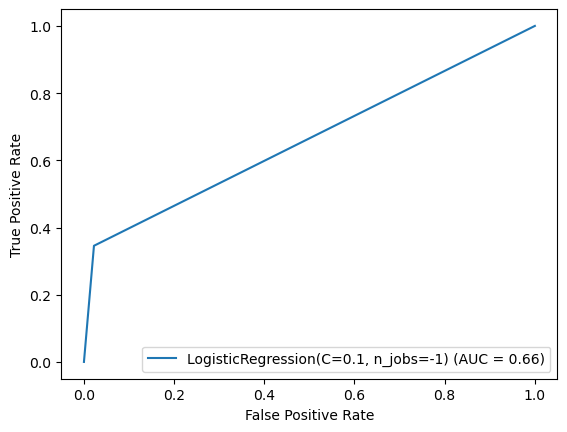

In [67]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics
fpr,tpr, thresholds=metrics.roc_curve(y_test, y_test_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 66%

In [69]:
#saving model using .pkl
import joblib
joblib.dump(best_model,"HR-attrition.pkl")

['HR-attrition.pkl']